In [65]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The aim of the project is to build a model for predicting the sale price of residential buildings based on the characteristics of the property.

The project covers the full cycle of data analytics:

data exploration and cleaning,

handling missing values and outliers,

visualization of price distribution and key features,

feature selection and transformation (feature engineering),

training LinearRegression and RandomForestRegressor models,

comparison of results and formation of predictions on the test data set.


In [66]:
test = pd.read_csv("D:/ProjectsKaggle/house/test.csv")
train = pd.read_csv("D:/ProjectsKaggle/house/train.csv")
sample = pd.read_csv("D:/ProjectsKaggle/house/sample_submission.csv")
pd.set_option('display.max_columns', None)

Number of rows and columns

In [67]:
train.shape

(1460, 81)

All rows and columns

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Descriptive statistics for quantitative columns for train

In [69]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


All missing values in columns

We create a DF that has 3 columns. The first is the number of missing values, the second is the percentage of missing values, and the third is the data types.

missing_values - Shows the number of missing values

missing_percentage - Shows in percentage how many values are missing in a column

missing_data - creating DF

In [70]:
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_percentage = (train.isnull().sum() / len(train) * 100).sort_values(ascending=False)
missing_type = train.dtypes
missing_data = pd.concat([missing_values, missing_percentage, missing_type], axis=1, keys=["Total Missing for train", "Percentage for train", "Type for train"])

Missing Value Columns for train

In [71]:
missing_data[missing_data["Total Missing for train"] > 0]

,Total Missing for train,Percentage for train,Type for train
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
MasVnrType,872,59.726027,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageQual,81,5.547945,object
GarageFinish,81,5.547945,object
GarageType,81,5.547945,object


Descriptive statistics for quantitative columns for test

In [72]:
test.describe()
missing_values_test = test.isnull().sum().sort_values(ascending=False)
missing_percentage_test = (test.isnull().sum() / len(test) * 100).sort_values(ascending=False)
missing_type_test = test.dtypes
missing_data_test = pd.concat([missing_values_test, missing_percentage_test, missing_type_test], axis=1, keys=["Total Missing for test", "Percentage for test", "Type for test"])

Missing Value Columns for test

In [73]:
missing_data_test[missing_data_test["Total Missing for test"] > 0]

,Total Missing for test,Percentage for test,Type for test
PoolQC,1456,99.794380,object
MiscFeature,1408,96.504455,object
Alley,1352,92.666210,object
Fence,1169,80.123372,object
MasVnrType,894,61.274846,object
FireplaceQu,730,50.034270,object
LotFrontage,227,15.558602,float64
GarageYrBlt,78,5.346127,float64
GarageCond,78,5.346127,object
GarageFinish,78,5.346127,object


Replacing empty values with mode and mean values for train

In [74]:
mode_columns_train = ["GarageQual", "GarageFinish", "GarageType", "GarageCond",
                "BsmtFinType2", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1", "Electrical"]
for column in mode_columns_train:
    train[column] = train[column].fillna(train[column].mode()[0])

mean_columns_train = ["MasVnrArea", "GarageYrBlt"]
for column in mean_columns_train:
    train[column] = train[column].fillna(train[column].mean())

Saving statistics from train

In [75]:
train_modes = {col: train[col].mode()[0] for col in mode_columns_train}
train_means = {col: train[col].mean() for col in mean_columns_train}

Replacing empty values with mode and mean values for test

In [76]:
mode_columns_test = ["GarageQual", "GarageFinish", "GarageType", "GarageCond", "Utilities", "Functional", "Exterior1st", "Exterior2nd",
                "BsmtFinType2", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1", "MSZoning", "SaleType", "KitchenQual"]
for column in mode_columns_test:
    if column in test.columns:
        test[column] = test[column].fillna(train_modes.get(column, test[column].mode()[0]))

For test we use the mean value or mode, where the gaps are 10%<x<25%

In [77]:
mean_columns_test = ["MasVnrArea", "GarageYrBlt", "BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "TotalBsmtSF", "BsmtUnfSF", "BsmtFinSF2",
                     "GarageCars", "GarageArea", "LotFrontage"]
for column in mean_columns_test:
    test[column] = train[column].fillna(train[column].mean())
for column in mean_columns_test:
    if column in test.columns:
        fill_value = train_means.get(column, test[column].mean())
        test[column] = test[column].fillna(fill_value)

Using interpolation to replace empty values where gaps are 10%<x<25%

In [78]:
train["LotFrontage"] = train["LotFrontage"].interpolate()

Removing empty values that have a gap value greater than 45% for train

In [79]:
drop_columns_train = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu"]
train = train.drop(columns=drop_columns_train)

Removing empty values that have a skip value greater than 45% for test

In [80]:
drop_columns_test = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu"]
test = test.drop(columns=drop_columns_test)

Let's see if there are any duplicate lines for train

In [81]:
train.duplicated().sum()

np.int64(0)

Let's see if there are any duplicate lines for test

In [82]:
test.duplicated().sum()

np.int64(0)

Statistics for SalePrice

In [83]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Graph without normalization

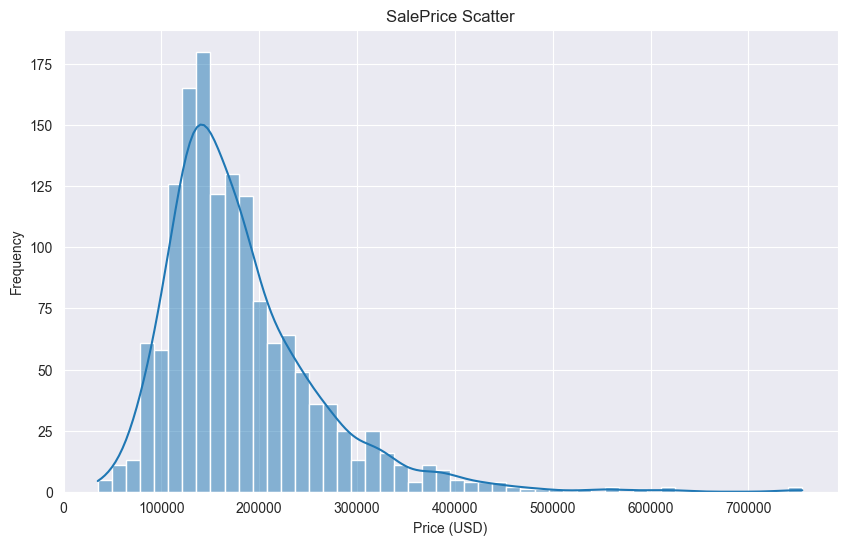

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=50)
plt.title("SalePrice Scatter")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

Normalization. Logarithmization.

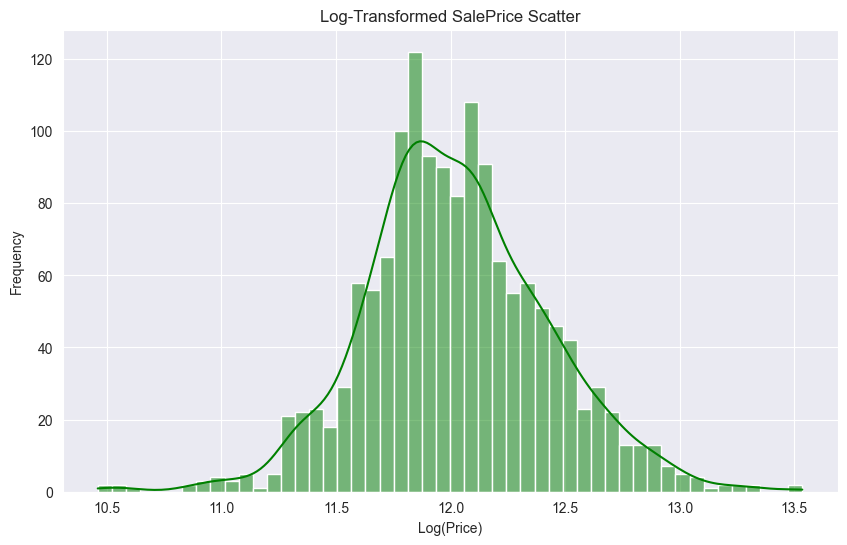

In [85]:
train["SalePrice_log"] = np.log1p(train["SalePrice"])
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice_log'], kde=True, bins=50, color='green')
plt.title("Log-Transformed SalePrice Scatter")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()

After normalization, it can be seen that the data is centered, which will improve the performance of the model.

Creating a heat map to find correlation

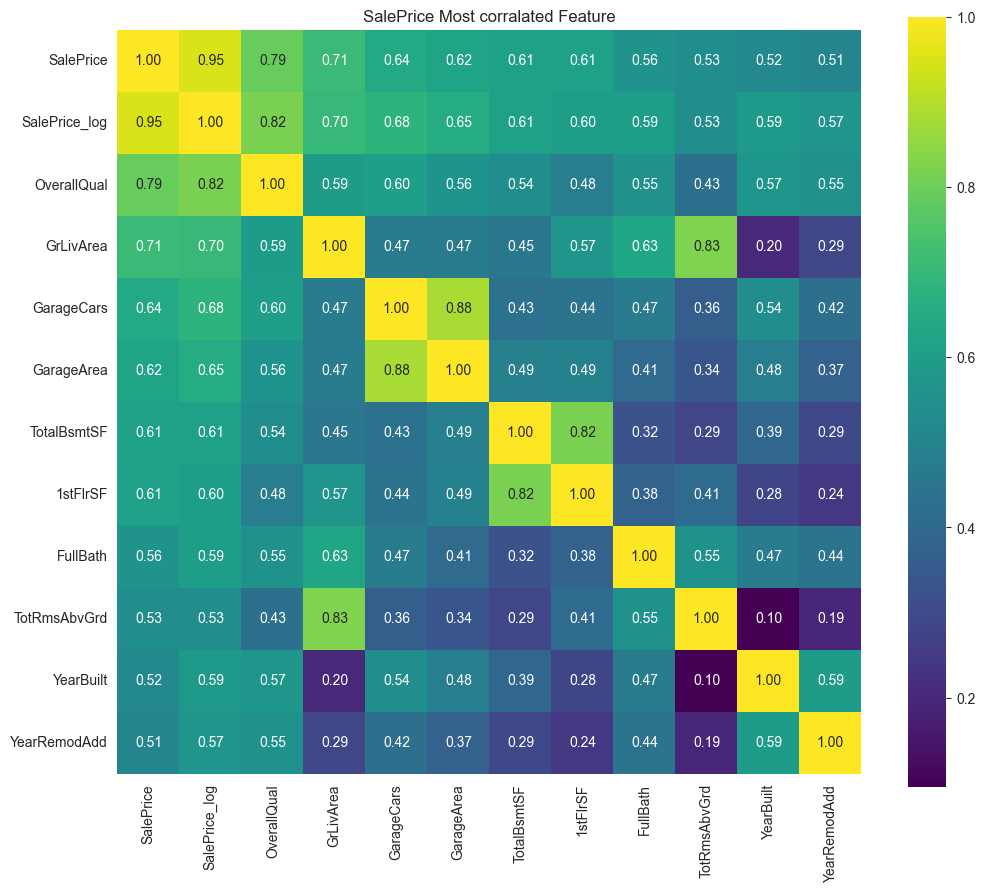

In [86]:
numerical_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_cols

corr_matrix = train[numerical_cols].corr()
k = 12
corr_top15 = corr_matrix.nlargest(k, "SalePrice")["SalePrice"].index
cm = np.corrcoef(train[corr_top15].values.T)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, square=True, fmt=".2f",
            annot_kws={"size": 10}, yticklabels=corr_top15.values, xticklabels=corr_top15.values,
            cmap="viridis")
plt.title("SalePrice Most сorralated Feature")
plt.show()

Identifying outliers for train

First, you need to plot a graph and make sure that there are a lot of emissions and they are not necessary. For example, a house can really be expensive.

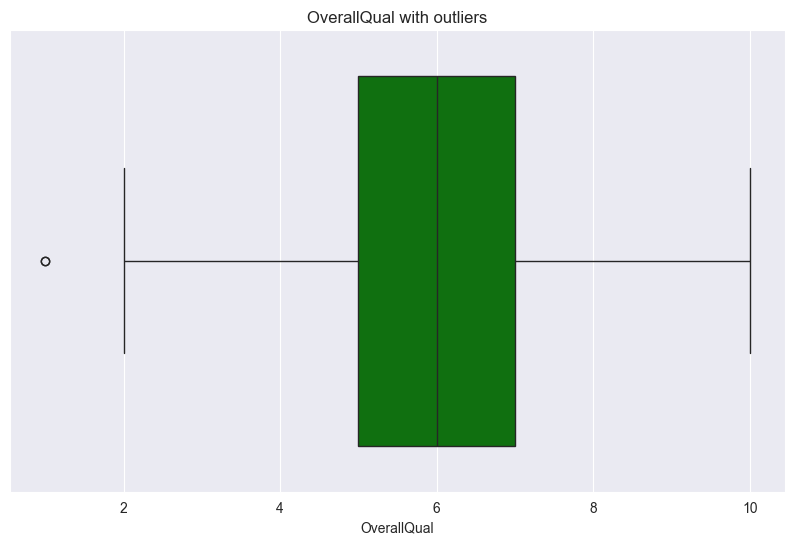

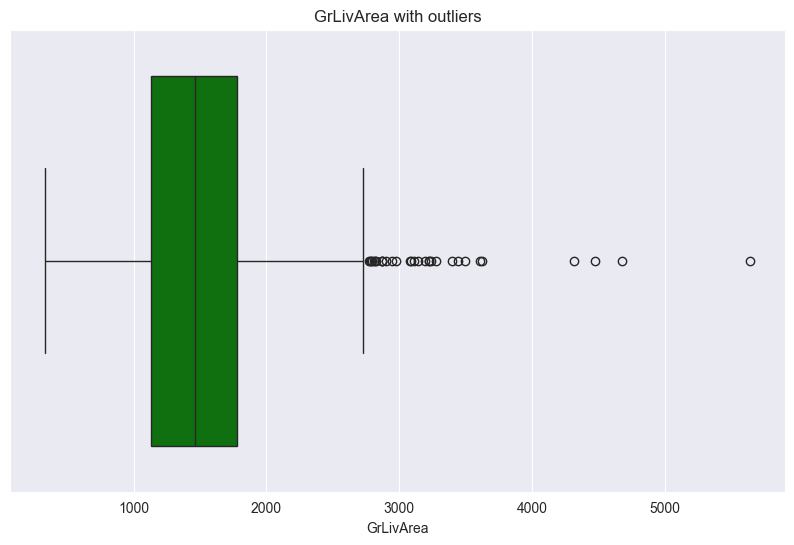

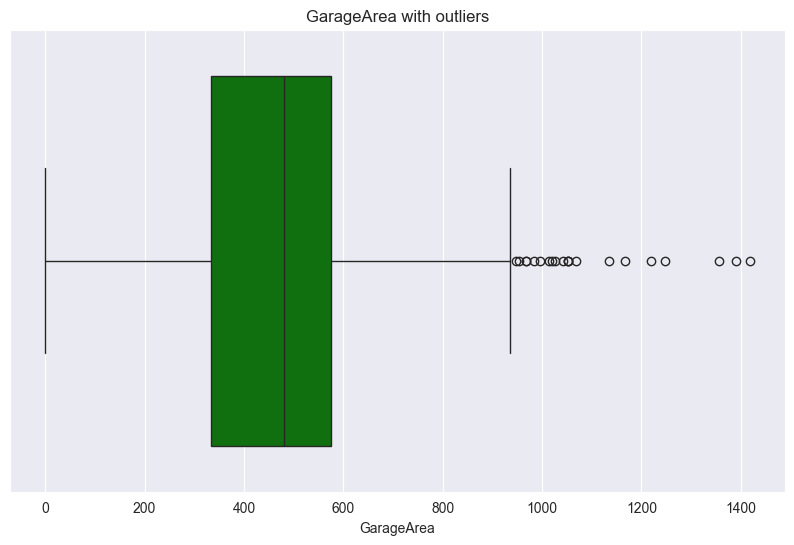

In [87]:
plt.figure(figsize = (10,6))
sns.boxplot(x = train["OverallQual"], color = "green")
plt.title("OverallQual with outliers")
plt.show()
plt.figure(figsize = (10,6))
sns.boxplot(x = train["GrLivArea"], color = "green")
plt.title("GrLivArea with outliers")
plt.show()
plt.figure(figsize = (10,6))
sns.boxplot(x = train["GarageArea"], color = "green")
plt.title("GarageArea with outliers")
plt.show()

Identifying outliers for test

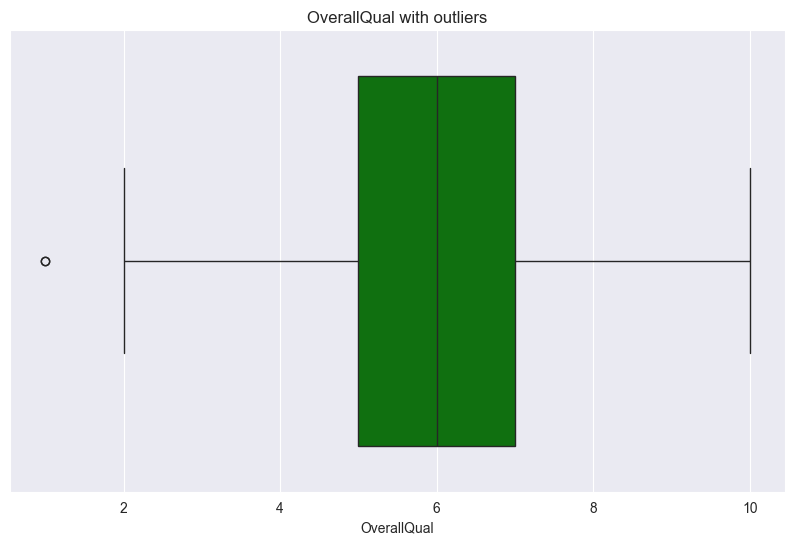

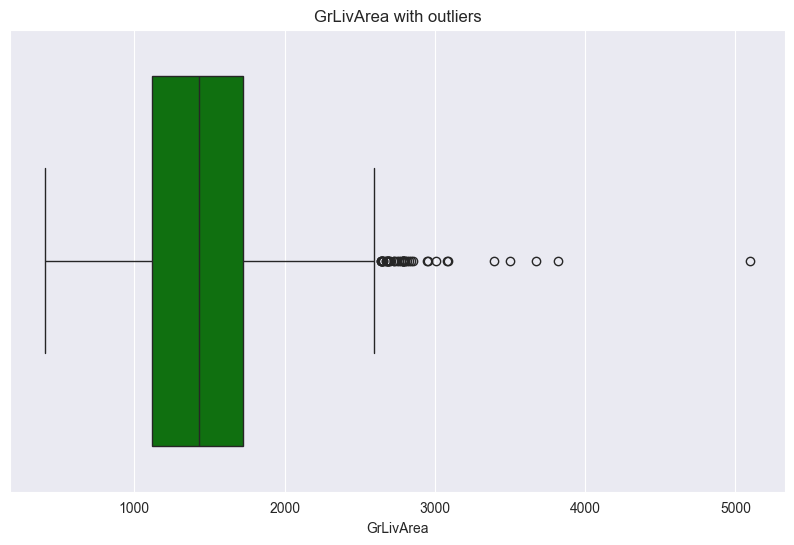

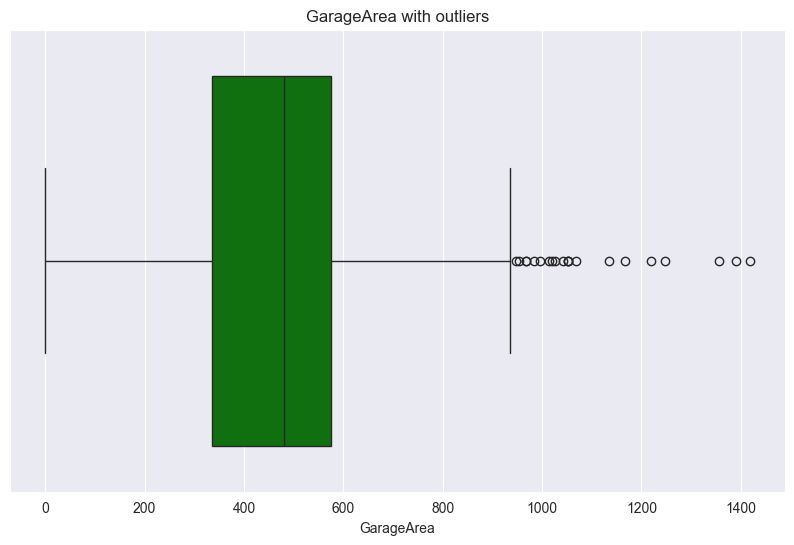

In [88]:
plt.figure(figsize = (10,6))
sns.boxplot(x = test["OverallQual"], color = "green")
plt.title("OverallQual with outliers")
plt.show()
plt.figure(figsize = (10,6))
sns.boxplot(x = test["GrLivArea"], color = "green")
plt.title("GrLivArea with outliers")
plt.show()
plt.figure(figsize = (10,6))
sns.boxplot(x = test["GarageArea"], color = "green")
plt.title("GarageArea with outliers")
plt.show()

Histogram before outliers for GrLivArea for train

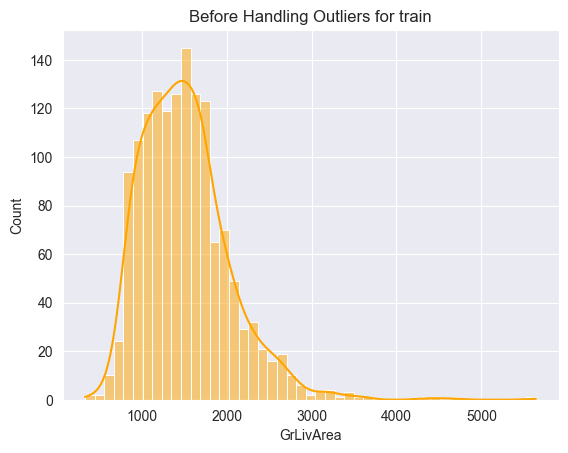

In [89]:
sns.histplot(train['GrLivArea'], kde=True, color='orange')
plt.title("Before Handling Outliers for train")
plt.show()

Histogram before outliers for GarageArea for train

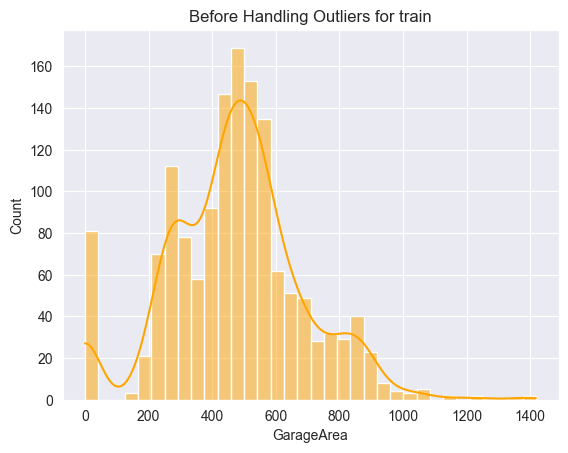

In [90]:
sns.histplot(train['GarageArea'], kde=True, color='orange')
plt.title("Before Handling Outliers for train")
plt.show()

Histogram before outliers for GrLivArea for test

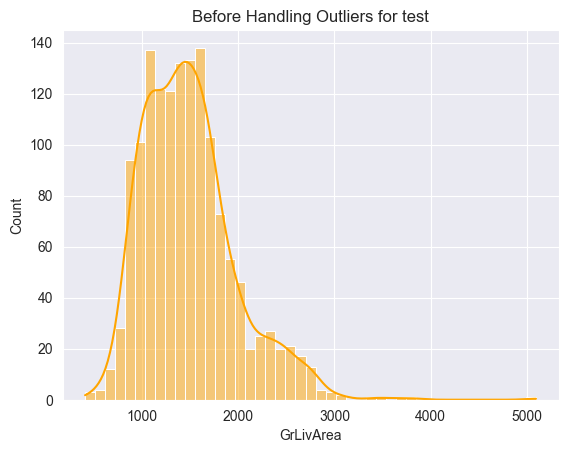

In [91]:
sns.histplot(test['GrLivArea'], kde=True, color='orange')
plt.title("Before Handling Outliers for test")
plt.show()

Histogram before outliers for GarageArea for test

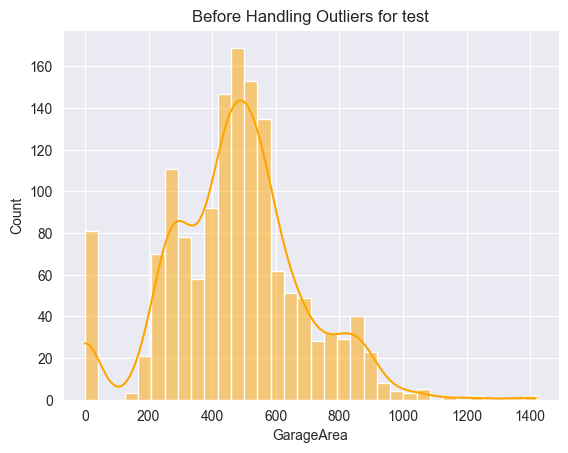

In [92]:
sns.histplot(test['GarageArea'], kde=True, color='orange')
plt.title("Before Handling Outliers for test")
plt.show()

IQR method for data that has many outliers for train

If the values go beyond lower_bound = Q1 - 1.5 * IQR and upper_bound = Q3 + 1.5 * IQR - these are outliers

In [93]:
Q1 = train["GrLivArea"].quantile(0.25)
Q3 = train["GrLivArea"].quantile(0.75)
IQR = Q3 - Q1
train = train[(train["GrLivArea"] >= Q1 - 1.5*IQR) & (train["GrLivArea"] <= Q3 + 1.5*IQR)]

Q1 = train["GarageArea"].quantile(0.25)
Q3 = train["GarageArea"].quantile(0.75)
IQR = Q3 - Q1
train = train[(train["GarageArea"] >= Q1 - 1.5*IQR) & (train["GarageArea"] <= Q3 + 1.5*IQR)]

IQR method for data that have many outliers for test

In [94]:
test["GrLivArea"] = test["GrLivArea"].clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR)

Resetting indices for train

In [95]:
train = train.reset_index(drop=True)

Resetting indices for test

In [96]:
test = test.reset_index(drop=True)

Histogram without outliers for GrLivArea for train

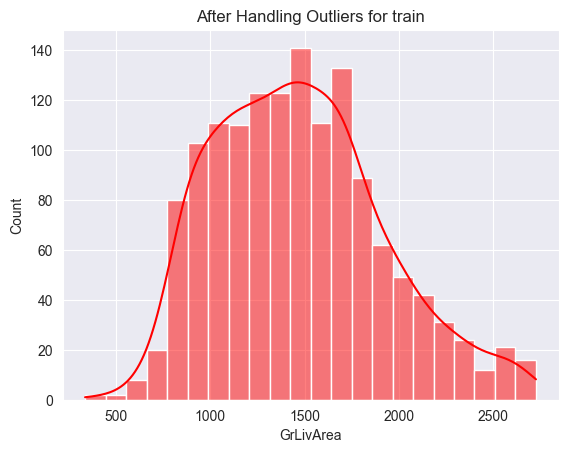

In [97]:
sns.histplot(train["GrLivArea"], kde=True, color='red')
plt.title("After Handling Outliers for train")
plt.show()

Outlier-free histogram for GarageArea for train

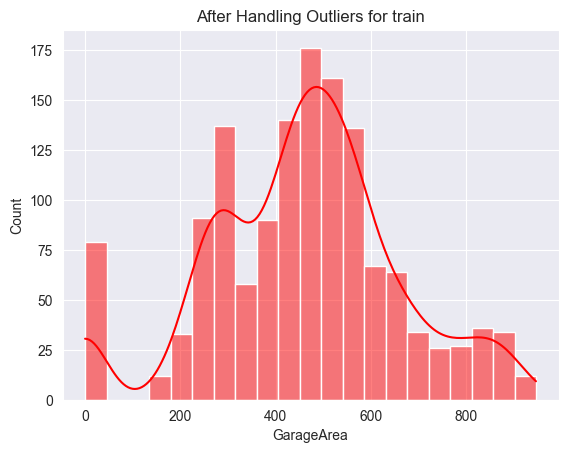

In [98]:
sns.histplot(train["GarageArea"], kde=True, color='red')
plt.title("After Handling Outliers for train")
plt.show()

Histogram without outliers for GrLivArea for test

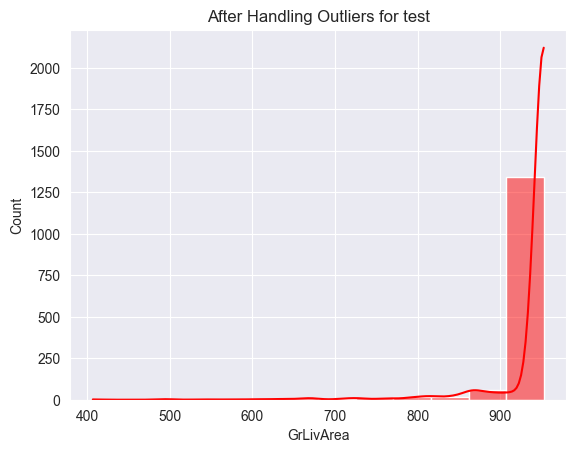

In [99]:
sns.histplot(test["GrLivArea"], kde=True, color='red')
plt.title("After Handling Outliers for test")
plt.show()

Histogram without outliers for GarageArea for test

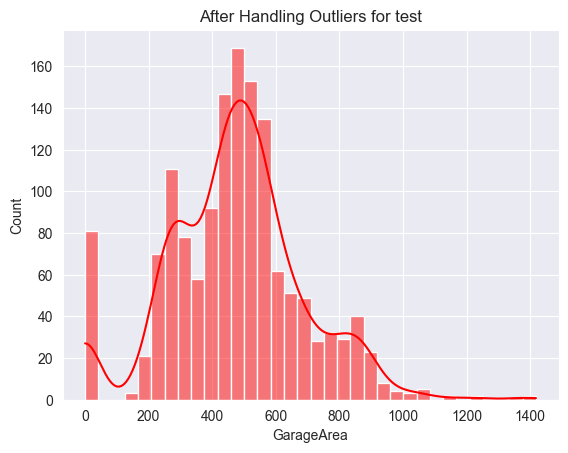

In [100]:
sns.histplot(test["GarageArea"], kde=True, color='red')
plt.title("After Handling Outliers for test")
plt.show()

Using Categorical Data for Analysis. Neighborhood for train

Data processing

In [101]:
train["Neighborhood"] = train["Neighborhood"].str.lower().str.strip()

One-hot encoding

In [102]:
df_encoded = pd.get_dummies(train, columns=["Neighborhood"], drop_first=True)
neighborhood_columns = [col for col in df_encoded.columns if col.startswith('Neighborhood_')]
df_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,Neighborhood_blueste,Neighborhood_brdale,Neighborhood_brkside,Neighborhood_clearcr,Neighborhood_collgcr,Neighborhood_crawfor,Neighborhood_edwards,Neighborhood_gilbert,Neighborhood_idotrr,Neighborhood_meadowv,Neighborhood_mitchel,Neighborhood_names,Neighborhood_noridge,Neighborhood_npkvill,Neighborhood_nridght,Neighborhood_nwames,Neighborhood_oldtown,Neighborhood_sawyer,Neighborhood_sawyerw,Neighborhood_somerst,Neighborhood_stonebr,Neighborhood_swisu,Neighborhood_timber,Neighborhood_veenker
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,12.247699,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,12.109016,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,12.317171,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,11.849405,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,12.429220,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


Using Categorical Data for Analysis. Neighborhood for test

In [103]:
test["Neighborhood"] = test["Neighborhood"].str.lower().str.strip()

One-hot encoding

In [104]:
df_encoded_t = pd.get_dummies(test, columns=["Neighborhood"], drop_first=True)
for col in neighborhood_columns:
    if col not in df_encoded_t.columns:
        df_encoded_t[col] = 0
df_encoded_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Neighborhood_blueste,Neighborhood_brdale,Neighborhood_brkside,Neighborhood_clearcr,Neighborhood_collgcr,Neighborhood_crawfor,Neighborhood_edwards,Neighborhood_gilbert,Neighborhood_idotrr,Neighborhood_meadowv,Neighborhood_mitchel,Neighborhood_names,Neighborhood_noridge,Neighborhood_npkvill,Neighborhood_nridght,Neighborhood_nwames,Neighborhood_oldtown,Neighborhood_sawyer,Neighborhood_sawyerw,Neighborhood_somerst,Neighborhood_stonebr,Neighborhood_swisu,Neighborhood_timber,Neighborhood_veenker
0,1461,20,RH,65.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,196.0,TA,TA,CBlock,TA,TA,No,Rec,706,LwQ,0,150,856,GasA,TA,Y,SBrkr,896,0,0,896.0,1,0,1,0,2,1,TA,5,Typ,0,Attchd,2003.0,Unf,2,548,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,1462,20,RL,80.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,0.0,TA,TA,CBlock,TA,TA,No,ALQ,978,Unf,0,284,1262,GasA,TA,Y,SBrkr,1329,0,0,952.5,0,1,1,1,3,1,Gd,6,Typ,0,Attchd,1976.0,Unf,2,460,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,1463,60,RL,68.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,162.0,TA,TA,PConc,Gd,TA,No,GLQ,486,Unf,0,434,920,GasA,Gd,Y,SBrkr,928,701,0,952.5,1,0,2,1,3,1,TA,6,Typ,1,Attchd,2001.0,Fin,2,608,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1464,60,RL,60.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,TA,TA,No,GLQ,216,Unf,0,540,756,GasA,Ex,Y,SBrkr,926,678,0,952.5,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,3,642,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1465,120,RL,84.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,350.0,Gd,TA,PConc,Gd,TA,No,ALQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1280,0,0,952.5,1,0,2,0,2,1,Gd,5,Typ,0,Attchd,2000.0,RFn,3,836,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In which area are houses more expensive?

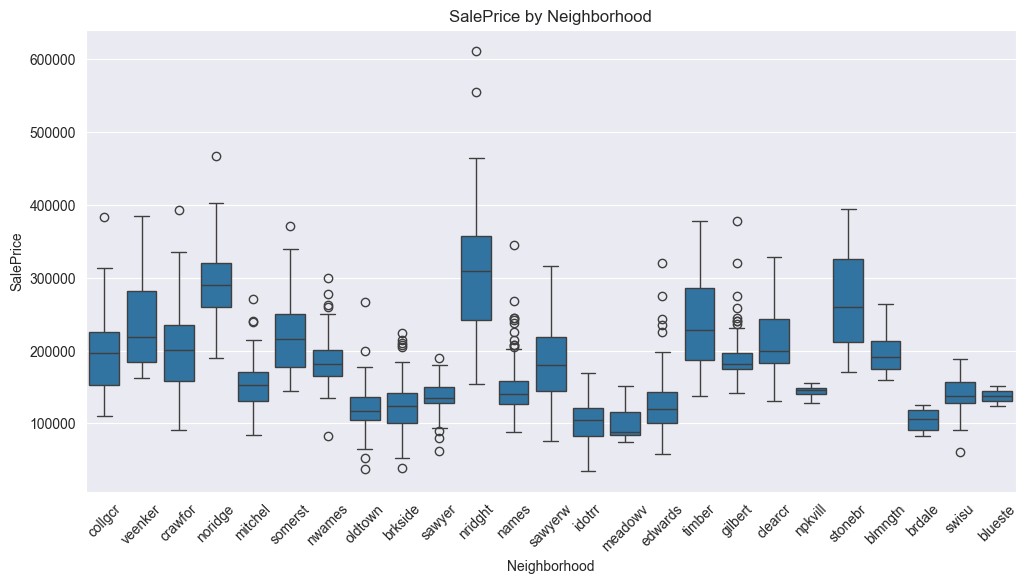

In [105]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Neighborhood", y='SalePrice', data=train)
plt.xticks(rotation=45)
plt.title("SalePrice by Neighborhood")
plt.show()

Creating a new df for the model for train

In [106]:
numeric_features = train[["OverallQual", "GrLivArea", "GarageArea"]]
neighborhood_features = df_encoded.filter(regex='^Neighborhood_')
all_features = pd.concat([numeric_features, neighborhood_features], axis=1)
all_features.head()

,OverallQual,GrLivArea,GarageArea,Neighborhood_blueste,Neighborhood_brdale,Neighborhood_brkside,Neighborhood_clearcr,Neighborhood_collgcr,Neighborhood_crawfor,Neighborhood_edwards,Neighborhood_gilbert,Neighborhood_idotrr,Neighborhood_meadowv,Neighborhood_mitchel,Neighborhood_names,Neighborhood_noridge,Neighborhood_npkvill,Neighborhood_nridght,Neighborhood_nwames,Neighborhood_oldtown,Neighborhood_sawyer,Neighborhood_sawyerw,Neighborhood_somerst,Neighborhood_stonebr,Neighborhood_swisu,Neighborhood_timber,Neighborhood_veenker
0,7,1710,548,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,6,1262,460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,7,1786,608,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,7,1717,642,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,8,2198,836,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


Creating a new df for the model for test

In [107]:
numeric_features_t = test[["OverallQual", "GrLivArea", "GarageArea"]]
neighborhood_features_t = df_encoded_t.filter(regex='^Neighborhood_')
all_features_t = pd.concat([numeric_features_t, neighborhood_features_t], axis=1)
all_features_t.head()

,OverallQual,GrLivArea,GarageArea,Neighborhood_blueste,Neighborhood_brdale,Neighborhood_brkside,Neighborhood_clearcr,Neighborhood_collgcr,Neighborhood_crawfor,Neighborhood_edwards,Neighborhood_gilbert,Neighborhood_idotrr,Neighborhood_meadowv,Neighborhood_mitchel,Neighborhood_names,Neighborhood_noridge,Neighborhood_npkvill,Neighborhood_nridght,Neighborhood_nwames,Neighborhood_oldtown,Neighborhood_sawyer,Neighborhood_sawyerw,Neighborhood_somerst,Neighborhood_stonebr,Neighborhood_swisu,Neighborhood_timber,Neighborhood_veenker
0,5,896.0,548,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,6,952.5,460,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,5,952.5,608,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,6,952.5,642,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,8,952.5,836,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


Column alignment

In [108]:
all_features_t = all_features_t[all_features.columns]
all_features_t.head()

,OverallQual,GrLivArea,GarageArea,Neighborhood_blueste,Neighborhood_brdale,Neighborhood_brkside,Neighborhood_clearcr,Neighborhood_collgcr,Neighborhood_crawfor,Neighborhood_edwards,Neighborhood_gilbert,Neighborhood_idotrr,Neighborhood_meadowv,Neighborhood_mitchel,Neighborhood_names,Neighborhood_noridge,Neighborhood_npkvill,Neighborhood_nridght,Neighborhood_nwames,Neighborhood_oldtown,Neighborhood_sawyer,Neighborhood_sawyerw,Neighborhood_somerst,Neighborhood_stonebr,Neighborhood_swisu,Neighborhood_timber,Neighborhood_veenker
0,5,896.0,548,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,6,952.5,460,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,5,952.5,608,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,6,952.5,642,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,8,952.5,836,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_features, train["SalePrice_log"], test_size = 0.2, random_state = 42)

Model training

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Linear

In [111]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("RandomForestRegressor")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

RandomForestRegressor


RandomForestRegressor

In [112]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

Metrics for linear regression. Log

In [113]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("RMSE", rmse_lr)
print("R2", r2_lr)

RMSE 0.1463222517662175
R2 0.8545311112781473


Metrics for RandomForestRegressor. Log"

In [114]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("RMSE", rmse_rf)
print("R2", r2_rf)

RMSE 0.16610166259201772
R2 0.8125448707213268


In [115]:
y_test_original = np.expm1(y_test)

Metrics for linear regression.

In [116]:
y_pred_lr_original = np.expm1(y_pred_lr)
rmse_lr_original = np.sqrt(mean_squared_error(y_test_original, y_pred_lr_original))
r2_lr_original = r2_score(y_test_original, y_pred_lr_original)
print("RMSE", rmse_lr_original)
print("R2", r2_lr_original)

RMSE 25192.78468715876
R2 0.8642775976515636


Metrics for RandomForestRegressor.

In [117]:
y_pred_rf_original = np.expm1(y_pred_rf)
rmse_rf_original = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original))
r2_rf_original = r2_score(y_test_original, y_pred_rf_original)
print("RMSE", rmse_rf_original)
print("R2", r2_rf_original)

RMSE 28244.19693371522
R2 0.8294083969402922


Cross-validation. Mean. Standard deviation. Linear model

In [118]:
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(lr, all_features, train["SalePrice_log"], cv = 3)
mean_lr = scores_lr.mean()
std_lr = scores_lr.std()
print("Average RMSE", mean_lr, "Standard Deviation", std_lr)

Average RMSE 0.8232581658688632 Standard Deviation 0.009078693545882305


Cross-validation. Average. Standard Deviation. Random Forest

In [119]:
scores_rf = cross_val_score(rf, all_features, train["SalePrice_log"], cv=3)
rmse_scores_rf = -scores_rf
mean_rf = rmse_scores_rf.mean()
std_rf = rmse_scores_rf.std()
print("Average RMSE:" , mean_rf, "Standard Deviation", std_rf)

Average RMSE: -0.7900592851372817 Standard Deviation 0.0051711900287019375


Comparison of models

In [120]:
models = ["Linear Regression", "Random Forest"]
rmse_values = [rmse_lr_original, rmse_rf_original]

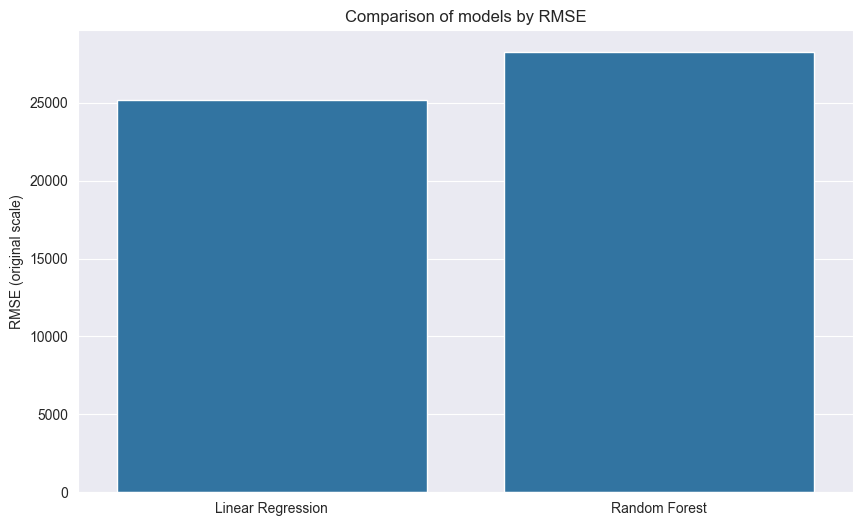

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_values)
plt.title("Comparison of models by RMSE")
plt.ylabel("RMSE (original scale)")
plt.show()

Train the best model on all data

In [122]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(all_features, train["SalePrice_log"])

RandomForestRegressor(random_state=42)

Predictions for test data

In [123]:
test_predictions_log = best_model.predict(all_features_t)
test_predictions = np.expm1(test_predictions_log)

Creating a file

In [124]:
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": test_predictions
})
submission.to_csv('D:/ProjectsKaggle/house/submission.csv', index=False)

Visualization of Predictions

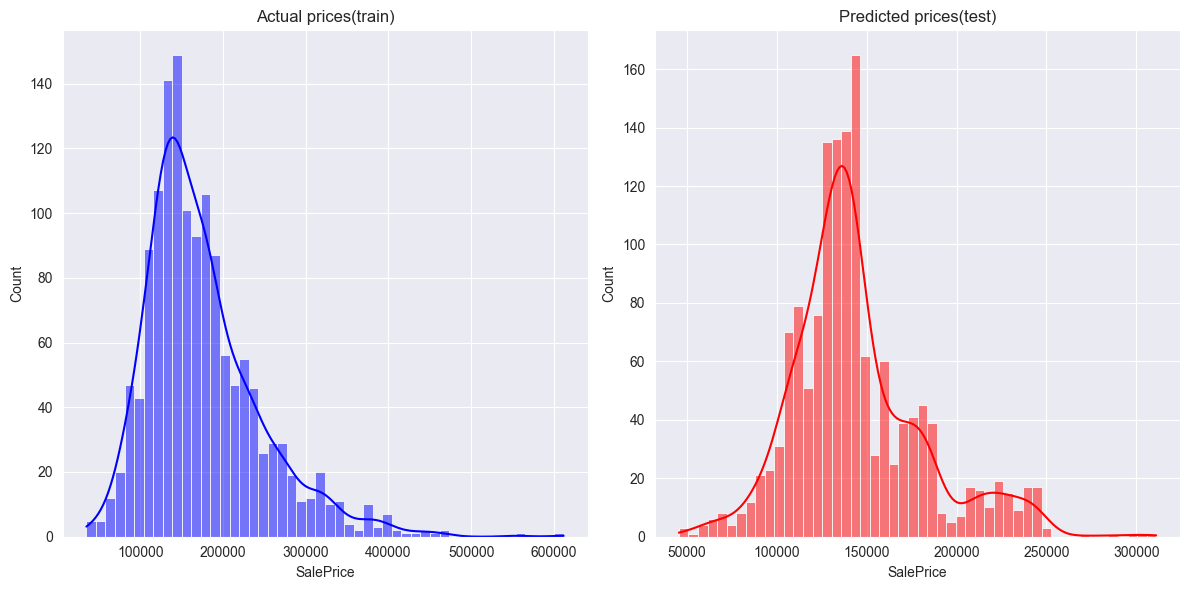

<Figure size 640x480 with 0 Axes>

In [125]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train["SalePrice"], bins=50, kde=True, color="blue")
plt.title("Actual prices(train)")

plt.subplot(1, 2, 2)
sns.histplot(submission["SalePrice"], bins=50, kde=True, color="red")
plt.title("Predicted prices(test)")

plt.tight_layout()
plt.show()


plt.savefig('figure_name.png', dpi=300, bbox_inches='tight')

Conclusion:

Preliminary analysis showed a high degree of influence of the OverallQual, GrLivArea and GarageArea features on the final sale price

The target variable (SalePrice) was normalized using logarithm, which improved the distribution and increased the accuracy of the model.

Outliers were identified and removed using the IQR method, which helped reduce the impact of extreme values on model training.

Using two models to identify the best result.

Cross-validation confirmed that linear regression has less variation in metric values across folds than random forest.

The final model (RandomForest) was further trained on the entire training set and used to predict prices on the test set.

The project was completed with partial use of open sources (Kaggle/ChatGPT/StackOverflow) and
my own analysis.
